# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
!pip install pandas scikit-learn kaggle matplotlib

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
from sklearn.preprocessing import LabelEncoder
import kagglehub
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy import stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [28]:
file_path = './dataset.csv'
df = pd.read_csv(file_path)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
#struktur data
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
# Checking for missing values in each column
missing_data = df.isnull().sum()
print("Missing data before handling:")
print(missing_data)

## datanya tidak memiliki missing value

Missing data before handling:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# Menampilkan statistik deskriptif untuk variabel numerik
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


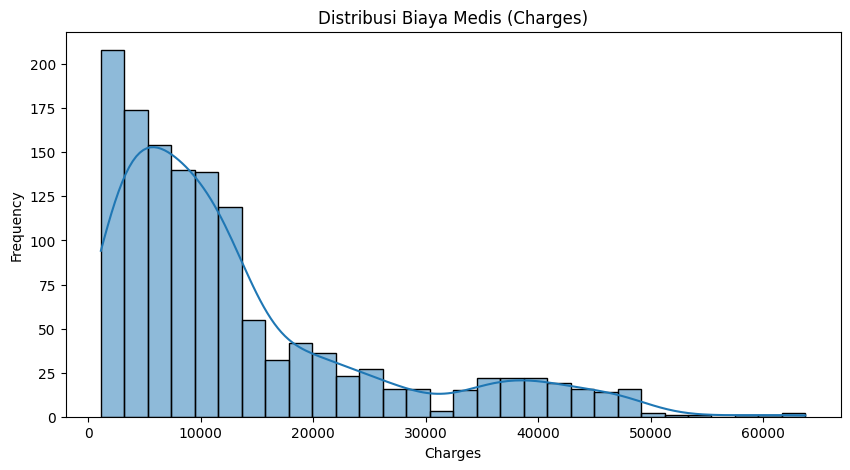

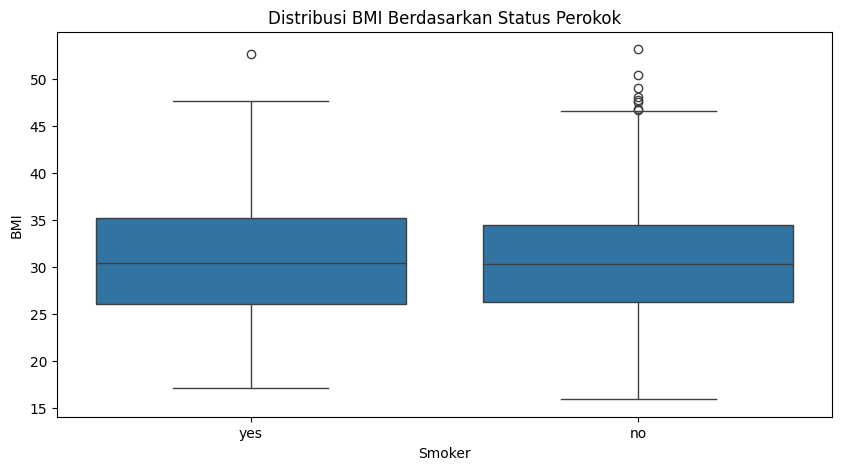

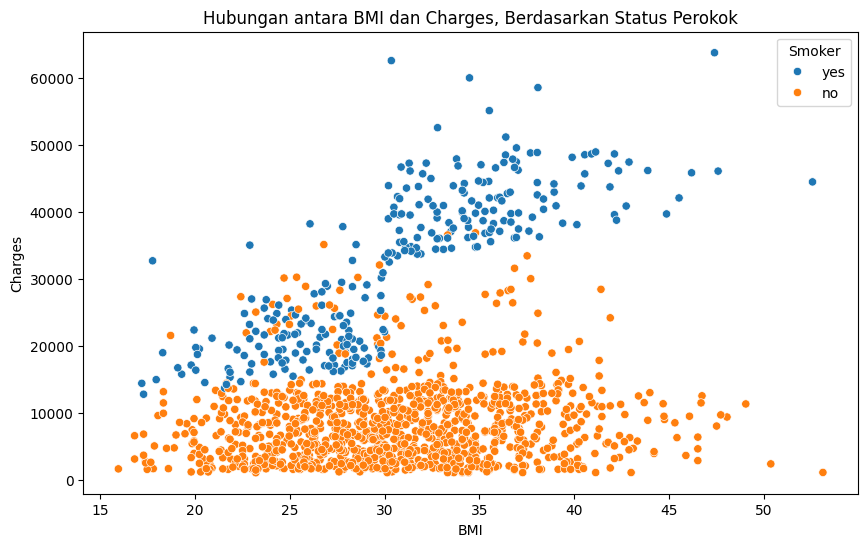

In [9]:
# Plot distribusi biaya medis (charges)
plt.figure(figsize=(10, 5))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribusi Biaya Medis (Charges)')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Plot distribusi BMI berdasarkan status perokok
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='smoker', y='bmi')
plt.title('Distribusi BMI Berdasarkan Status Perokok')
plt.xlabel('Smoker')
plt.ylabel('BMI')
plt.show()

# Plot hubungan antara biaya medis dan BMI, dikategorikan oleh status perokok
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Hubungan antara BMI dan Charges, Berdasarkan Status Perokok')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

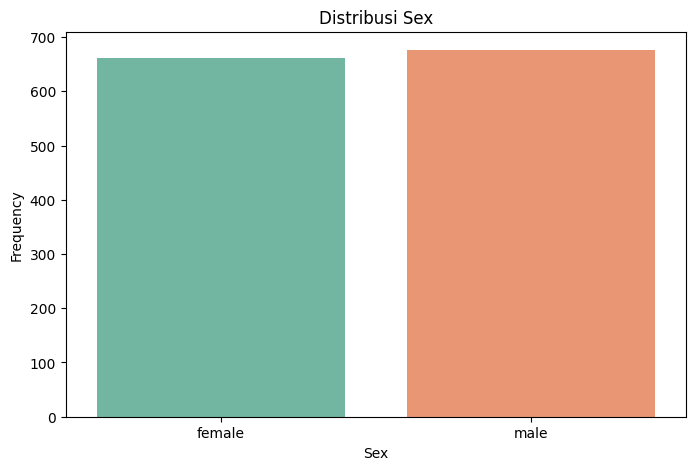

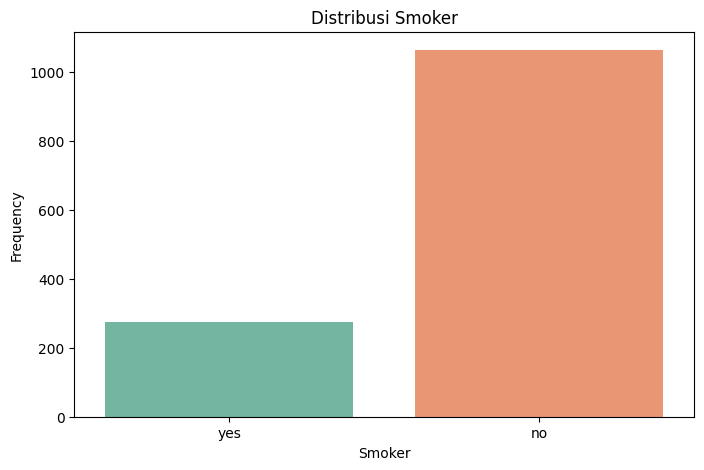

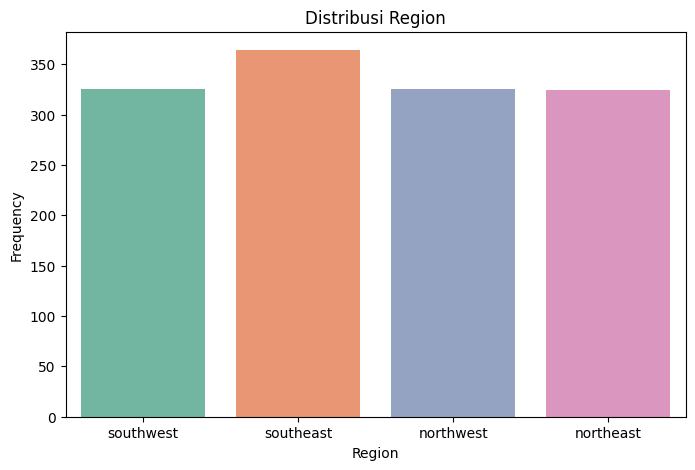

In [10]:
# Daftar variabel kategorikal
categorical_columns = ['sex', 'smoker', 'region']

# Membuat countplot untuk setiap variabel kategorikal
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue=column, palette="Set2", legend=False)
    plt.title(f'Distribusi {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.show()

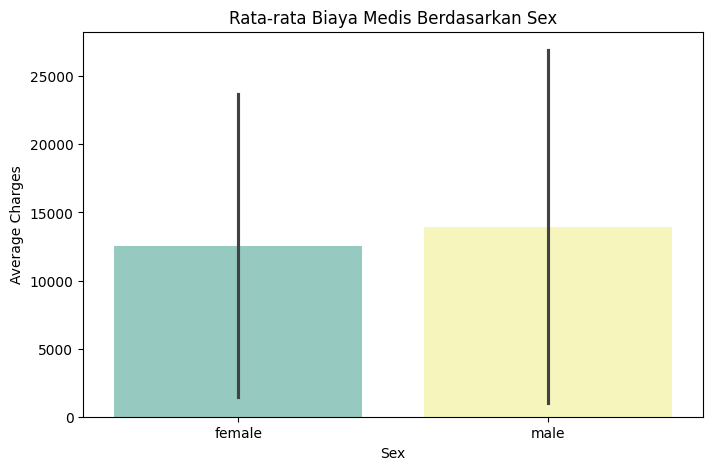

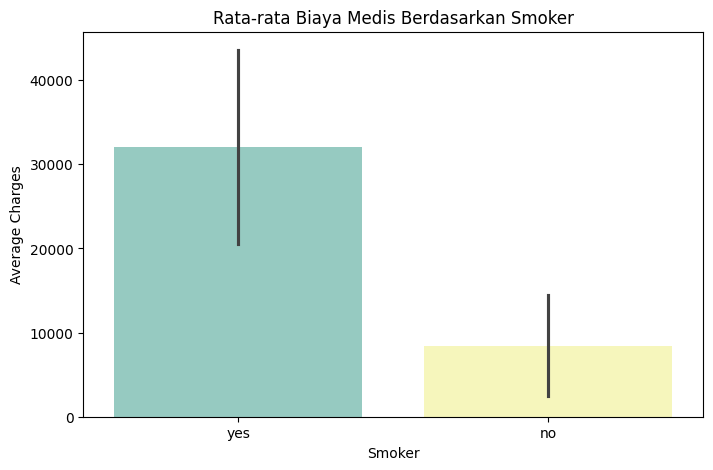

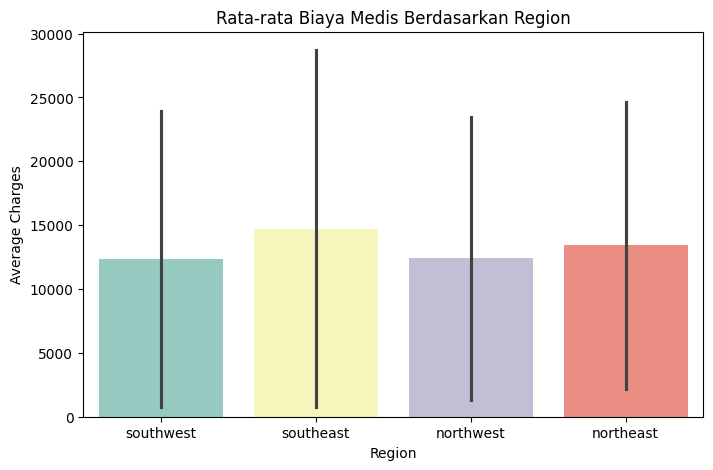

In [11]:
# Membuat diagram batang rata-rata biaya medis berdasarkan kategori
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x=column, y='charges', hue=column, errorbar='sd', palette="Set3", dodge=False, legend=False)
    plt.title(f'Rata-rata Biaya Medis Berdasarkan {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Average Charges')
    plt.show()

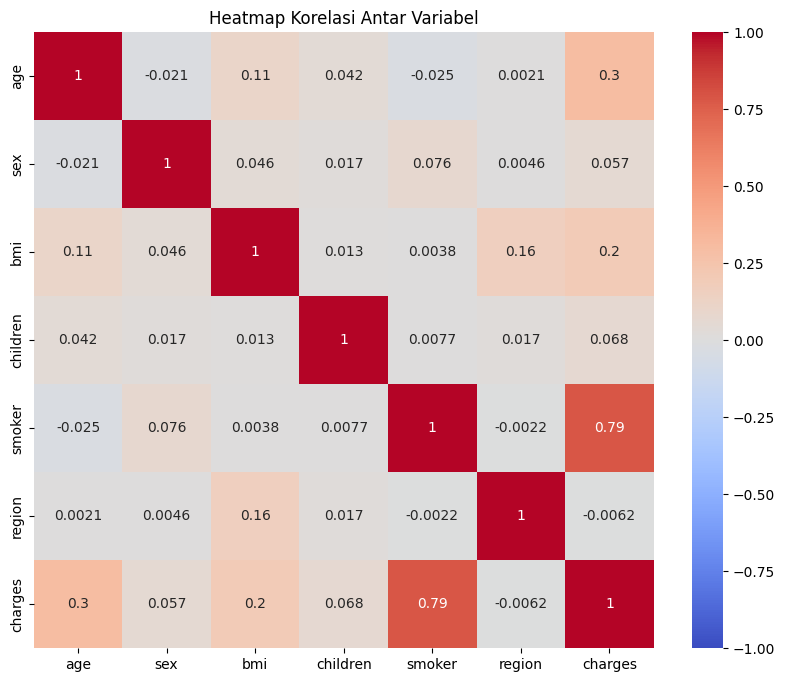

In [12]:
# Mengonversi kolom kategorikal menjadi numerik
label_cols = ['sex', 'smoker', 'region']
df_encoded = df.copy()
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df[col])

corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

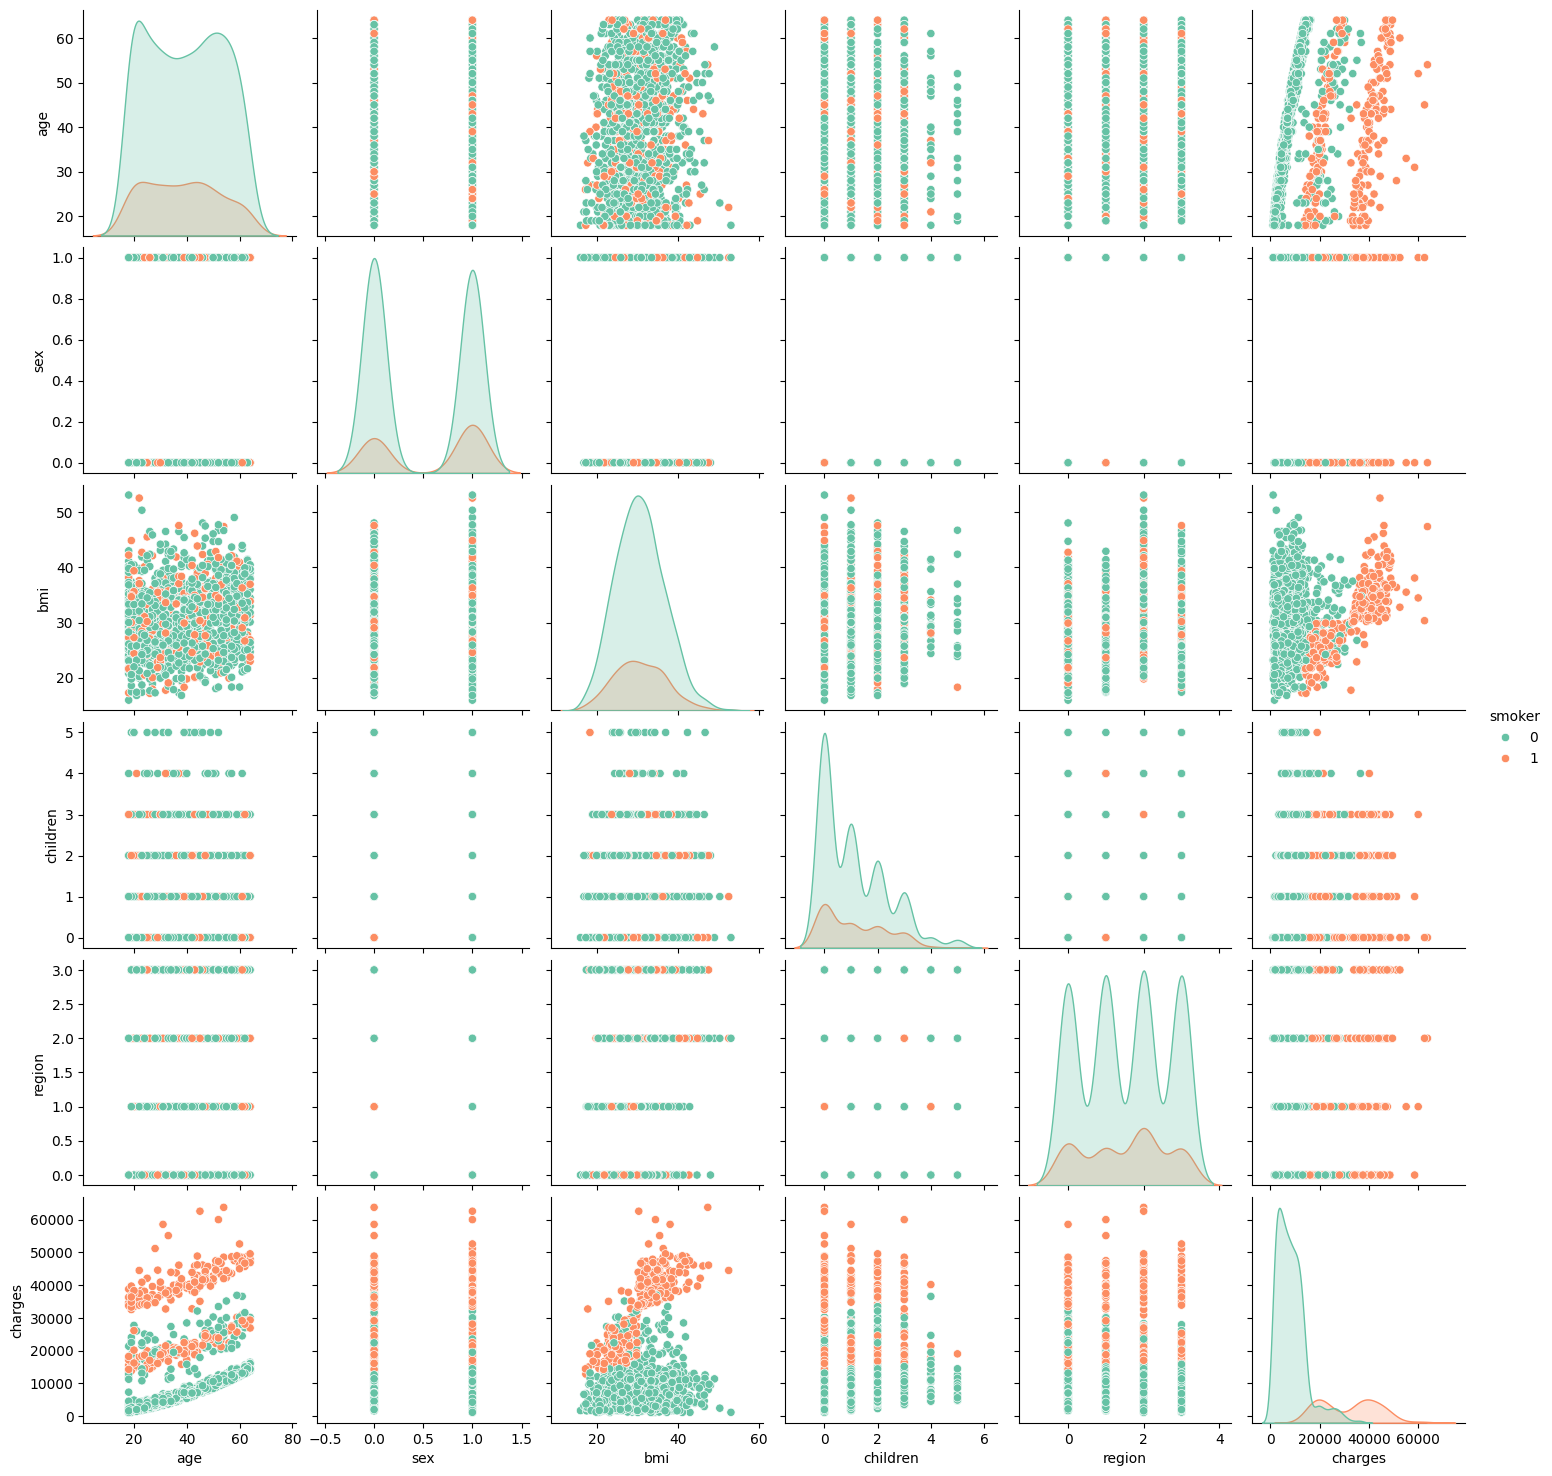

In [13]:
# Membuat Pairplot untuk hubungan antar variabel numerik, dikategorikan berdasarkan 'smoker'
sns.pairplot(df_encoded, hue='smoker', palette="Set2", diag_kind='kde')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [14]:
# Ambil fitur yang relevan untuk clustering

label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if needed for interpretation

# Select relevant features for clustering
df_selected = df[['age', 'bmi', 'smoker', 'charges']]

In [15]:
# Menghapus Data Duplikat
print(f"Jumlah data duplikat sebelum penghapusan: {df_selected.duplicated().sum()}")
df_selected = df_selected.drop_duplicates()
print(f"Jumlah data duplikat setelah penghapusan: {df_selected.duplicated().sum()}")

Jumlah data duplikat sebelum penghapusan: 1
Jumlah data duplikat setelah penghapusan: 0


In [16]:
#penanganan outlier
z_threshold = 3

# Pilih hanya kolom numerik
numerical_columns = df_selected.select_dtypes(include=['float64', 'int64']).columns

# Buat mask untuk setiap kolom yang mendeteksi outlier berdasarkan Z-score
outlier_masks = {}

# Deteksi outlier per kolom
for column in numerical_columns:
    outlier_masks[column] = abs(stats.zscore(df_selected[column])) > z_threshold

# Menggabungkan semua mask untuk mendeteksi baris dengan setidaknya satu outlier
combined_outlier_mask = pd.DataFrame(outlier_masks).any(axis=1)

# Jumlah data sebelum penghapusan
print("Jumlah data sebelum penghapusan:", len(df_selected))

# Menghapus baris dengan setidaknya satu outlier
data_cleaned = df_selected[~combined_outlier_mask]

# Jumlah data setelah penghapusan
print("Jumlah data setelah penghapusan:", len(data_cleaned))

Jumlah data sebelum penghapusan: 1337
Jumlah data setelah penghapusan: 1326


In [17]:
# Standarisasi data
scaler = StandardScaler()
df_scaled_first = scaler.fit_transform(data_cleaned)

# Display scaled data
print(df_scaled_first[:5])
print(df_scaled_first.shape[0])

[[-1.44157277 -0.44582943  1.99623706  0.32941053]
 [-1.51283985  0.53405478 -0.50094251 -0.96930063]
 [-0.80016909  0.40551801 -0.50094251 -0.73594189]
 [-0.44383372 -1.3130353  -0.50094251  0.7662913 ]
 [-0.51510079 -0.28223717 -0.50094251 -0.78585411]]
1326


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [18]:
# KMeans algoritma
kmeans_all = KMeans(n_clusters=3, random_state=42).fit(df_scaled_first)
labels_all = kmeans_all.labels_
silhouette_all = silhouette_score(df_scaled_first, labels_all)

print("Silhouette Score without Feature Selection:", silhouette_all)

Silhouette Score without Feature Selection: 0.3665416308924034


In [19]:
# Feature Selection (Pemilihan Fitur)
# Hitung matriks korelasi dan pilih fitur dengan korelasi tertinggi
correlation_matrix = data_cleaned.corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

# Memilih fitur berdasarkan korelasi tertinggi terhadap variabel target yang paling relevan (misal: charges)
target_variable = 'charges'
correlation_with_target = correlation_matrix[target_variable].abs()
selected_features = correlation_with_target[correlation_with_target > 0.2].index  # Threshold korelasi > 0.2
selected_features = selected_features.drop(target_variable)  # Kecualikan target dari fitur terpilih
print("\nFitur Terpilih Berdasarkan Korelasi:\n", selected_features)

# Memilih subset data berdasarkan fitur terpilih
data_selected = data_cleaned[selected_features]


Matriks Korelasi:
               age       bmi    smoker   charges
age      1.000000  0.118088 -0.027726  0.306378
bmi      0.118088  1.000000 -0.007973  0.189157
smoker  -0.027726 -0.007973  1.000000  0.784877
charges  0.306378  0.189157  0.784877  1.000000

Fitur Terpilih Berdasarkan Korelasi:
 Index(['age', 'smoker'], dtype='object')


In [20]:
# Standarisasi data setelah feature selection
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_selected)

# Display scaled data
print(df_scaled[:5])
print(df_scaled.shape[0])

[[-1.44157277  1.99623706]
 [-1.51283985 -0.50094251]
 [-0.80016909 -0.50094251]
 [-0.44383372 -0.50094251]
 [-0.51510079 -0.50094251]]
1326


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Best silhouette score: 0.6366152565326522 with 4 clusters


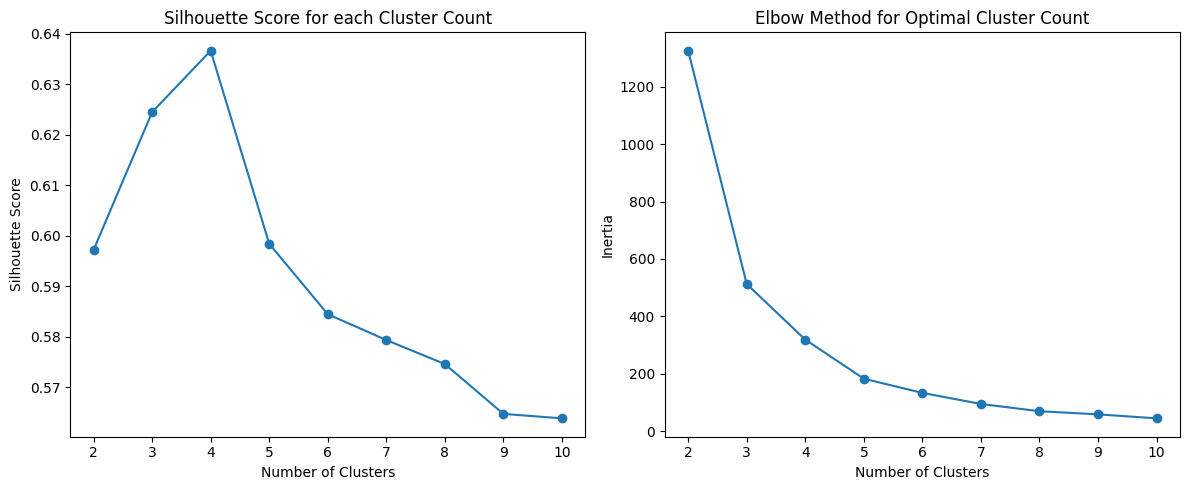

In [21]:
# deteksi banyak kluster dengan  silhouette score and Elbow Method
range_n_clusters = range(2, 11)
best_score = -1
best_n_clusters = 0
scores = []
inertia_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    inertia = kmeans.inertia_  # Jumlah kuadrat jarak sampel ke pusat cluster terdekatnya
    scores.append(score)
    inertia_values.append(inertia)

    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

# Cetak skor siluet terbaik dan jumlah cluster yang sesuai
print(f'Best silhouette score: {best_score} with {best_n_clusters} clusters')

# Plot skor siluet untuk setiap jumlah cluster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each Cluster Count')

# Plot nilai inersia untuk setiap jumlah cluster (Elbow Method)
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Count')

plt.tight_layout()
plt.show()

In [22]:
# Melakukan Clustering Akhir dengan Jumlah Cluster Optimal
kmeans_final = KMeans(n_clusters=best_n_clusters, random_state=42)
final_labels = kmeans_final.fit_predict(df_scaled)

# Hasil clustering akhir
data_cleaned['Cluster'] = final_labels
print("\nData dengan cluster akhir:")
print(data_cleaned.head())
# Menghitung rata-rata untuk setiap cluster
cluster_means = data_cleaned.groupby('Cluster').mean()
print(cluster_means)





Data dengan cluster akhir:
   age     bmi  smoker      charges  Cluster
0   19  27.900       1  16884.92400        1
1   18  33.770       0   1725.55230        2
2   28  33.000       0   4449.46200        2
3   33  22.705       0  21984.47061        2
4   32  28.880       0   3866.85520        2
               age        bmi  smoker       charges
Cluster                                            
0        51.206522  31.281259     0.0  11574.228778
1        27.100000  30.186286     1.0  27949.149219
2        26.618110  29.848612     0.0   5056.033025
3        51.063492  30.796627     1.0  35083.370379


<ipython-input-22-fd47da4f7f83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = final_labels


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [23]:

#  Pemodelan dan evaluasi tanpa feature selection
kmeans_all = KMeans(n_clusters=3, random_state=42).fit(df_scaled_first)
labels_all = kmeans_all.labels_
silhouette_all = silhouette_score(df_scaled_first, labels_all)

print("Silhouette Score without Feature Selection:", silhouette_all)

# Pemodelan dan evaluasi dengan feature selection
kmeans_selected = KMeans(n_clusters=4, random_state=42).fit(df_scaled)
labels_selected = kmeans_selected.labels_
silhouette_selected = silhouette_score(df_scaled, labels_selected)

print("Silhouette Score with Feature Selection:", silhouette_selected)

# Step 4: Perbandingan hasil
if silhouette_selected > silhouette_all:
    print("\nFeature selection improved the clustering model's performance.")
else:
    print("\nFeature selection did not improve the clustering model's performance.")

Silhouette Score without Feature Selection: 0.3665416308924034
Silhouette Score with Feature Selection: 0.6366152565326522

Feature selection improved the clustering model's performance.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

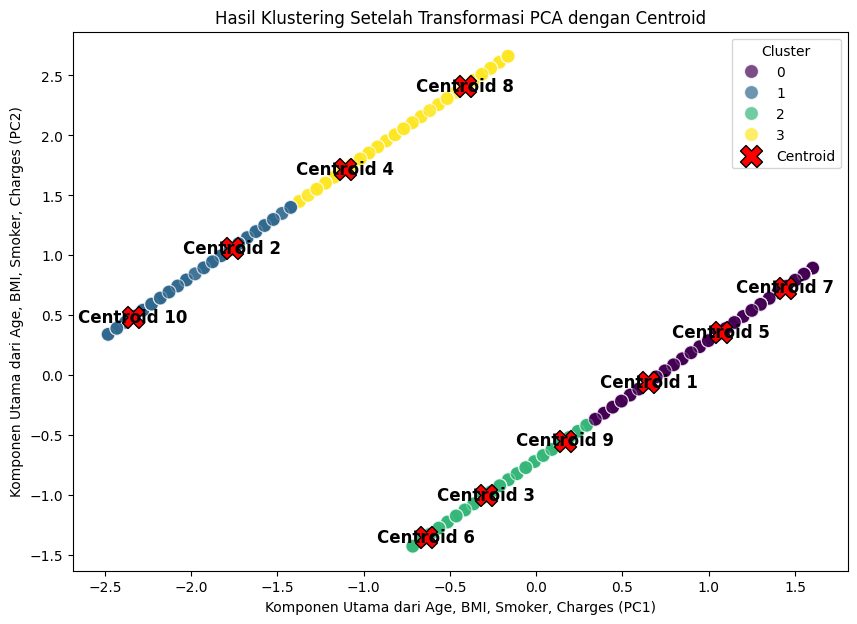

In [24]:
# Buat DataFrame untuk hasil PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = final_labels  # Tambahkan label cluster ke DataFrame PCA

# Transformasikan centroid KMeans ke dalam ruang PCA
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)  # Transformasikan centroid ke ruang 2D PCA

# Plot hasil PCA dengan centroid
plt.figure(figsize=(10, 7))

# Plot scatter plot untuk data yang telah ditransformasi dengan PCA
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7, edgecolor='w', legend='full')

# Plot centroid
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=250, marker='X', edgecolor='black', label='Centroid')

# Tambahkan label pada setiap centroid
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y, f'Centroid {i+1}', color='black', fontsize=12, ha='center', va='center', fontweight='bold')

# Tambahkan judul dan label sumbu
plt.title('Hasil Klustering Setelah Transformasi PCA dengan Centroid')
plt.xlabel('Komponen Utama dari Age, BMI, Smoker, Charges (PC1)')
plt.ylabel('Komponen Utama dari Age, BMI, Smoker, Charges (PC2)')

# Tampilkan legend
plt.legend(title='Cluster')

# Tampilkan plot
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

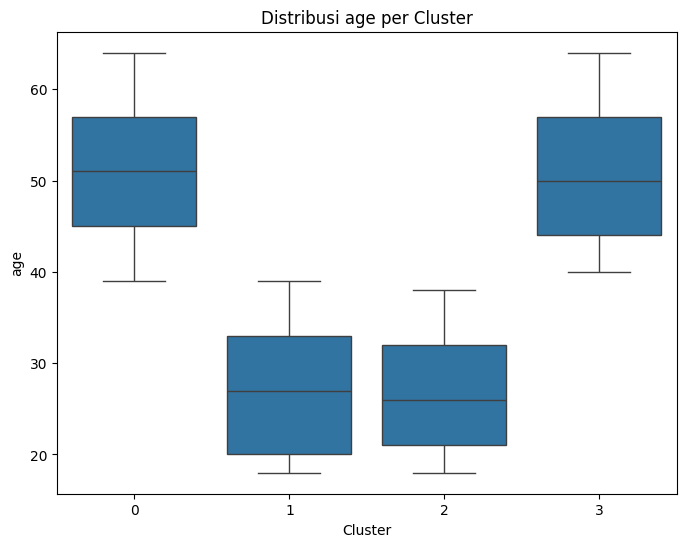

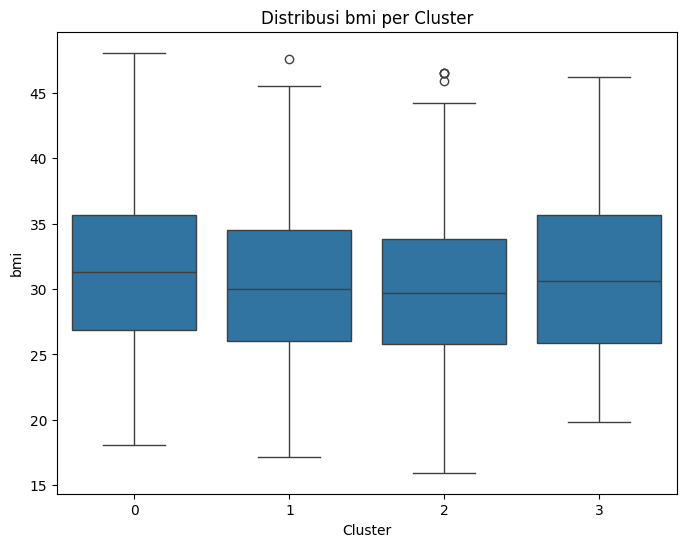

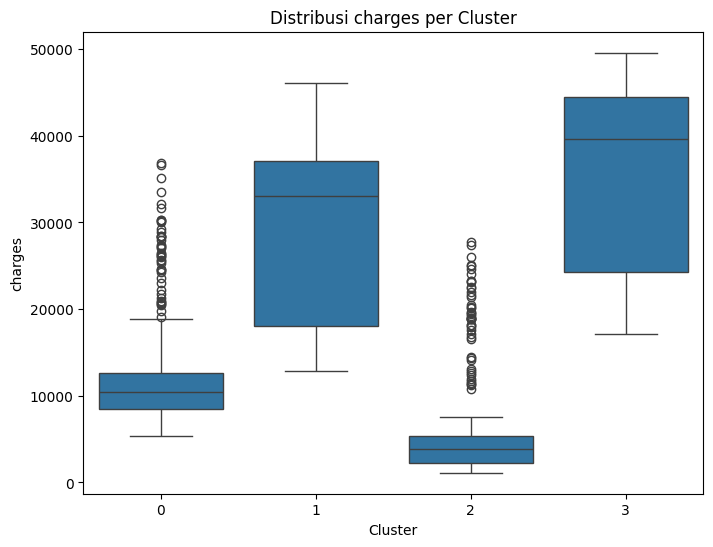

In [25]:
# Analisis distribusi data dalam setiap cluster (untuk fitur numerik)
for column in ['age', 'bmi', 'charges']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_cleaned, x='Cluster', y=column)
    plt.title(f'Distribusi {column} per Cluster')
    plt.show()

Tulis hasil interpretasinya di sini.
Tulis hasil interpretasinya di sini.
1. Cluster 1: Individu Muda, Tidak Merokok, BMI Rendah - Biaya Medis Rendah
Karakteristik: Cluster ini kemungkinan berisi individu yang lebih muda dengan BMI rendah dan tidak memiliki kebiasaan merokok.
Biaya Medis (Charges): Biaya medis pada cluster ini cenderung rendah, karena orang-orang dalam kelompok ini biasanya memiliki risiko kesehatan yang lebih kecil dan sedikit memerlukan intervensi medis.
Interpretasi Bisnis: Individu dalam cluster ini bisa dianggap sebagai profil risiko rendah, sehingga mungkin bisa ditawarkan premi asuransi yang lebih terjangkau atau minimal.
2. Cluster 2: Individu Usia Menengah, Perokok, BMI Sedang - Biaya Medis Menengah hingga Tinggi
Karakteristik: Cluster ini mungkin terdiri dari individu berusia menengah yang merokok, dengan BMI sedang.
Biaya Medis (Charges): Biaya medis di cluster ini mungkin menengah hingga tinggi karena kombinasi faktor risiko dari usia menengah dan kebiasaan merokok, meskipun BMI masih dalam kisaran sedang.
Interpretasi Bisnis: Individu dalam cluster ini menunjukkan peningkatan risiko kesehatan, terutama dari kebiasaan merokok. Mereka mungkin memerlukan premi yang lebih tinggi dibandingkan kelompok non-perokok.
3. Cluster 3: Individu Usia Tua, Tidak Merokok, BMI Tinggi - Biaya Medis Tinggi
Karakteristik: Individu dalam cluster ini kemungkinan berusia tua dengan BMI tinggi, tetapi tidak merokok.
Biaya Medis (Charges): Kelompok ini cenderung memiliki biaya medis yang lebih tinggi, karena faktor usia tua dan BMI tinggi yang biasanya berhubungan dengan risiko kesehatan.
Interpretasi Bisnis: Walaupun mereka bukan perokok, individu dengan profil ini dapat menghadapi masalah kesehatan yang serius terkait usia dan obesitas, sehingga mungkin membutuhkan asuransi kesehatan yang lebih komprehensif dengan premi yang lebih tinggi.
4. Cluster 4: Individu Usia Tua, Perokok, BMI Tinggi - Biaya Medis Sangat Tinggi
Karakteristik: Cluster ini mungkin mencakup individu yang lebih tua, perokok, dan memiliki BMI yang tinggi.
Biaya Medis (Charges): Individu dalam kelompok ini kemungkinan besar memiliki biaya medis tertinggi, karena kombinasi dari tiga faktor risiko utama: usia tua, kebiasaan merokok, dan BMI tinggi.
Interpretasi Bisnis: Cluster ini bisa dianggap sebagai kelompok dengan risiko kesehatan yang paling tinggi, sehingga premi asuransi yang lebih tinggi atau intervensi kesehatan tambahan (seperti program kesehatan khusus) mungkin diperlukan untuk mengelola risiko mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [26]:
data_cleaned.to_csv('clustering_results.csv', index=False)
print("Clustering results exported to 'clustering_results.csv'")

Clustering results exported to 'clustering_results.csv'
